In [54]:
import pandas as pd
import numpy
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dic2018 = {}
for i in range(1,8,6):
    if i<10:
        dic2018[i] = pd.read_csv(f"data/2018/20180{i}-citibike-tripdata.csv")
    else:
        dic2018[i] = pd.read_csv(f"data/2018/2018{i}-citibike-tripdata.csv")

In [3]:
year2018 = pd.concat([dic2018[1],dic2018[7]])

In [49]:
year2018 = year2018.reset_index(drop=True)
s_w_hour = year2018.starttime.to_frame()

In [50]:
for index,row in s_w_hour.iterrows():
    row[0] = row[0].split(".")[0]
    row[0] = datetime.strptime(row[0],"%Y-%m-%d %H:%M:%S")

In [51]:
s_w_hour = s_w_hour.groupby([s_w_hour.starttime.map(lambda x:x.month),s_w_hour.starttime.map(lambda x:x.hour)])["starttime"].count()

In [53]:
s_w_hour.to_csv("data/s_w_hour.csv")

In [ ]:
year2018.to_csv("data/2018.csv")

In [91]:
s_w_hour = pd.read_csv("data/s_w_hour.csv")

In [92]:
s_w_hour = s_w_hour.rename(columns = {"1":"Month","0":"Hour","5163":"Total Records"})

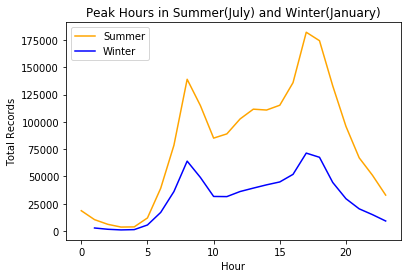

In [118]:
winter = s_w_hour.loc[s_w_hour.Month==1][["Hour","Total Records"]]
summer = s_w_hour.loc[s_w_hour.Month==7][["Hour","Total Records"]]
plt.plot(summer.Hour,summer["Total Records"],c="orange")
plt.plot(winter.Hour,winter["Total Records"],c="blue")
plt.legend(labels=["Summer","Winter"])
plt.xlabel("Hour")
plt.ylabel("Total Records")
plt.title("Peak Hours in Summer(July) and Winter(January)")
plt.savefig("data/peak.png")

<Figure size 432x288 with 0 Axes>